In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np
import papermill as pm

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [2]:
Nsim = 15
FirstStim = 9
LastStim = 20.0

In [3]:
conf = Configuration('confH-ReflexM-WaveCurve.rmto')

In [4]:
print Nsim
print FirstStim
print LastStim

15
9
20.0


In [5]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

Mp = np.zeros((int(Nsim), 1))
Hp = np.zeros((int(Nsim), 1))
Stim = np.zeros((int(Nsim), 1))
emg = np.zeros([len(t), int(Nsim)])
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = AfferentPool(conf,'Ia', 'SOL')
pools[2]= AfferentPool(conf,'Ia', 'LG')
Syn = SynapsesFactory(conf, pools)
del Syn 

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345813 synapses were built
All the 0 synaptic noises were built


In [6]:
for j  in xrange(0, int(Nsim)):
    Stim[j] = FirstStim + j * (LastStim - FirstStim) / (Nsim - 1)
    conf.changeConfigurationParameter('stimIntensity_PTN', FirstStim + j * (LastStim - FirstStim) / (Nsim - 1),'')
    for k in xrange(0, len(pools)):
        for i in xrange(0,len(pools[k].unit)):
            pools[k].unit[i].createStimulus()
    tic = time.time()
    for i in xrange(0, len(t)-1):
        pools[0].atualizeMotorUnitPool(t[i])
        pools[1].atualizeAfferentPool(t[i],0)
        pools[2].atualizeAfferentPool(t[i],0)
    toc = time.time()
    print str(toc - tic) + ' seconds'
    pools[0].getMotorUnitPoolEMG()
    Mp[j] = np.max(pools[0].emg[t<20]) - np.min(pools[0].emg[t<20])
    Hp[j] = np.max(pools[0].emg[t>20]) - np.min(pools[0].emg[t>20])
    print Mp[j]
    print Hp[j]
    emg[:,[j]] = pools[0].emg
    pools[0].listSpikes()
    pools[1].listSpikes()
    pools[2].listSpikes()
    sp1 = pools[0].poolTerminalSpikes
    sp2 = pools[1].poolTerminalSpikes
    sp2 = pools[2].poolTerminalSpikes
    for k in xrange(0, len(pools)):
        pools[k].reset()

67.9973778725 seconds
[ 0.]
[ 0.]
68.0103290081 seconds
[ 0.]
[ 0.]
69.6476500034 seconds
[ 0.]
[ 0.]
69.8765728474 seconds
[ 0.]
[ 0.04825672]
69.6803770065 seconds
[ 0.]
[ 0.2674982]
70.4235060215 seconds
[ 0.44803411]
[ 0.54351833]
71.0731198788 seconds
[ 0.84352375]
[ 0.82969718]
72.2728569508 seconds
[ 1.10252421]
[ 0.70989544]
72.6528480053 seconds
[ 1.28044543]
[ 0.5166858]
73.4577760696 seconds
[ 1.44234922]
[ 0.31291929]
73.9448099136 seconds
[ 1.51376607]
[ 0.20052665]
74.3285419941 seconds
[ 1.58801018]
[ 0.07866654]
76.3817980289 seconds
[ 1.61457031]
[ 0.01240512]
76.2285299301 seconds
[ 1.62392558]
[  1.08996822e-07]
76.5675590038 seconds
[ 1.62765921]
[ 0.1574169]


<IPython.core.display.Javascript object>


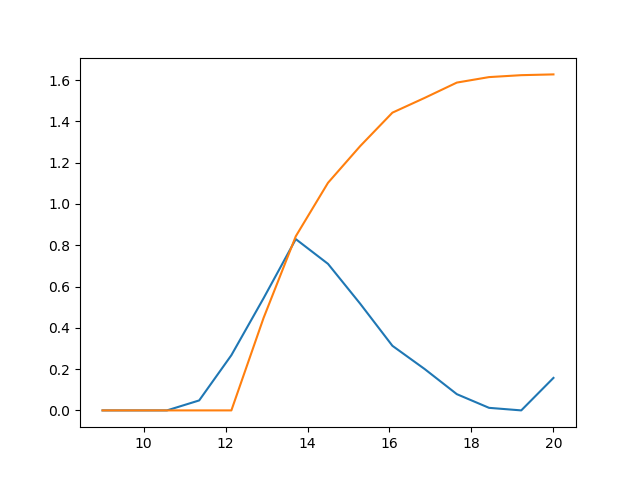

<IPython.core.display.Javascript object>


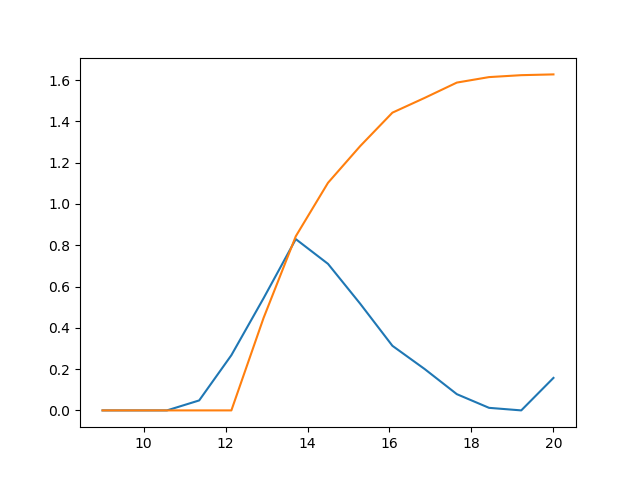

In [7]:
f1 = plt.figure()
plt.plot(Stim, Hp, Stim, Mp)
pm.display('mHcurves', f1)

In [8]:
np.max(Hp)/np.max(Mp)

0.50974871063831428

In [9]:
Mp

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.44803411],
       [ 0.84352375],
       [ 1.10252421],
       [ 1.28044543],
       [ 1.44234922],
       [ 1.51376607],
       [ 1.58801018],
       [ 1.61457031],
       [ 1.62392558],
       [ 1.62765921]])

<IPython.core.display.Javascript object>


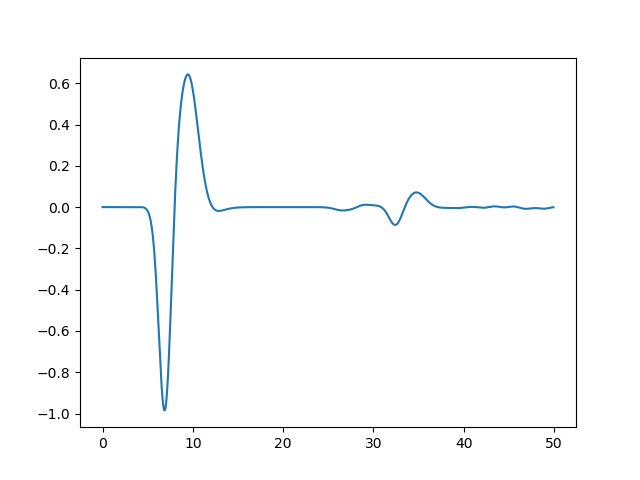

<IPython.core.display.Javascript object>


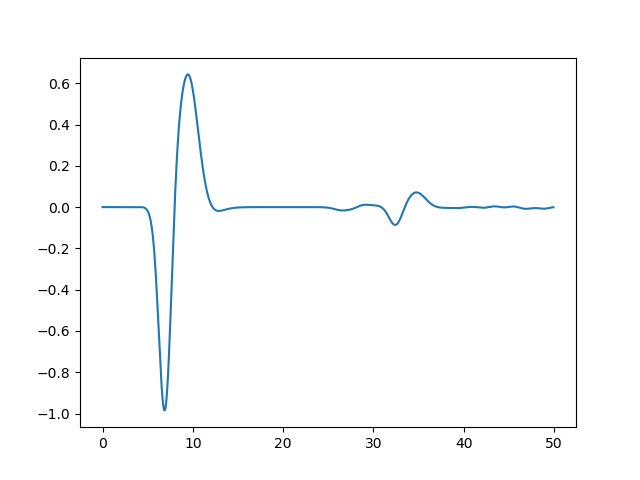

In [10]:
f2 = plt.figure()
plt.plot(t, emg[:,14])
pm.display('mhsignal', f2)

In [11]:
pools[0].listSpikes()

<IPython.core.display.Javascript object>


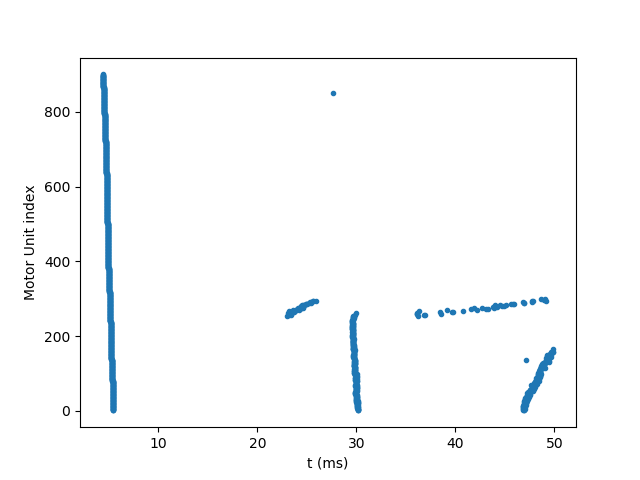

<IPython.core.display.Javascript object>


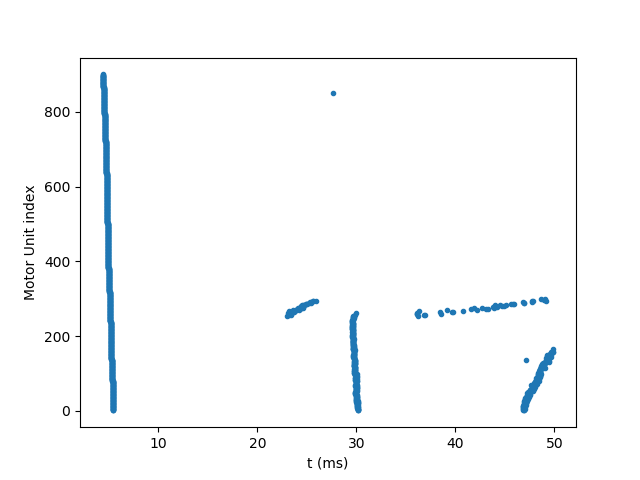

In [12]:
f3 = plt.figure()
plt.plot(sp1[:, 0],
    sp1[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')
pm.display('MNspikes', f3)

In [13]:
pools[0].poolTerminalSpikes[:, 1]

array([], dtype=float64)